# Benchmark to evaluate the optimization gained in Local MDS

In [13]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [ ]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from sklearn.datasets import make_swiss_roll
from private_lmds import lmds_R, lmds_R_optimized
from utils import benchmark, apply_principal_components

## Check that both Local MDS implementations return the same embedding

In [32]:
n=750
k=10
tau=0.5

X, color = make_swiss_roll(n_samples=n, random_state=42)
distances = squareform(pdist(X))

embedding_original = lmds_R(distances, d=2, k=k, tau=tau, verbose=2)
embedding_original = apply_principal_components(embedding_original)

embedding_optimized = lmds_R_optimized(
    distances, d=2, k=k, tau=tau, verbose=2)
embedding_optimized = apply_principal_components(embedding_optimized)

Minimizing lmds with tau=0.5, k=10
niter=100 stress=-511515.15098
niter=200 stress=-724736.63917
niter=300 stress=-907932.306
niter=400 stress=-1139644.22159
niter=500 stress=-1356157.37851
niter=600 stress=-1568041.3315
niter=700 stress=-1739139.42508
niter=800 stress=-1882408.97234
niter=900 stress=-1990377.41172
niter=1000 stress=-2068028.86519
niter=1100 stress=-2131667.77017
niter=1200 stress=-2173008.71362
niter=1300 stress=-2205414.33929
niter=1400 stress=-2226235.51168
niter=1500 stress=-2241657.54515
niter=1600 stress=-2251675.06097
niter=1700 stress=-2258541.36464
niter=1800 stress=-2264044.52567
niter=1900 stress=-2267481.47357
niter=2000 stress=-2270093.44425
niter=2100 stress=-2271812.07062
niter=2200 stress=-2272990.89325
niter=2300 stress=-2273937.99672
niter=2400 stress=-2274619.29527
niter=2500 stress=-2275051.75483
niter=2600 stress=-2275381.77152
niter=2700 stress=-2275601.47623
niter=2800 stress=-2275752.5509
niter=2900 stress=-2275875.74193
niter=3000 stress=-22759

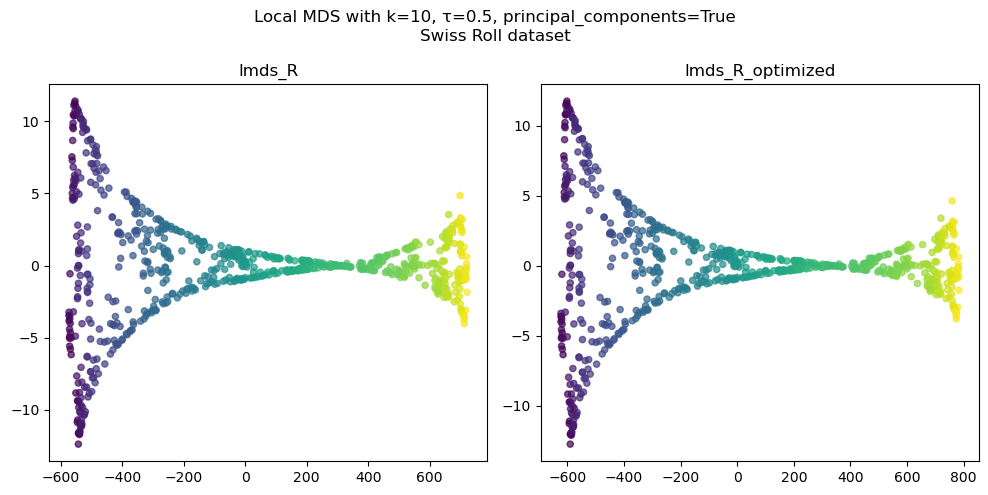

In [37]:
# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(
    f'Local MDS with k={k}, τ={tau}, principal_components=True\nSwiss Roll dataset')
ax = axes[0]
ax.scatter(
    embedding_original[:, 0], embedding_original[:, 1], c=color, s=20, alpha=0.7)
ax.set_title(
    f'lmds_R')

ax = axes[1]
ax.scatter(
    embedding_optimized[:, 0], embedding_optimized[:, 1], c=color, s=20, alpha=0.7)
ax.set_title(
    f'lmds_R_optimized')

plt.tight_layout()

## Run benchmark

In [38]:
# Run a single benchmark
def run_benchmark_for_params(params):
    n = int(params['n'])
    k = int(params['k'])
    tau = float(params['tau'])

    X, _ = make_swiss_roll(n_samples=n, random_state=42)
    distances = squareform(pdist(X))

    # Time both implementations
    _, original_time = benchmark(lmds_R,
                                 distances, d=2, k=k, tau=tau, verbose=2)
    _, optimized_time = benchmark(lmds_R_optimized,
                                  distances, d=2, k=k, tau=tau, verbose=2)

    return pd.Series({
        'original_time': original_time,
        'optimized_time': optimized_time
    })

In [ ]:
# Parameters
n_values = [500, 1000]
k_values = [8, 10]
tau_values = [0.1, 0.5]
runs = 20

param_grid = pd.DataFrame([
    {'n': n, 'k': k, 'tau': tau}
    for n, k, tau in itertools.product(n_values, k_values, tau_values)
])

results_path = os.path.join('d_and_c', 'LMDS', 'optimization_benchmark')
os.makedirs(results_path, exist_ok=True)
csv_path = os.path.join(results_path, 'LMDS_optimization_results.csv')

print("Starting performance comparison between lmds_R and lmds_R_optimized...")
print("=" * 80)

# First run (separate from rest to create csv if necessary)
timing_results = param_grid.apply(run_benchmark_for_params, axis=1)
results_run = pd.concat([param_grid, timing_results], axis=1)
if not os.path.exists(csv_path):
    results_run.to_csv(csv_path, index=False)
else:
    results_run.to_csv(csv_path, index=False, mode='a', header=False)

# Remaining runs
for i in range(1, runs):
    timing_results = param_grid.apply(run_benchmark_for_params, axis=1)
    results_run = pd.concat([param_grid, timing_results], axis=1)
    results_run.to_csv(csv_path, index=False, mode='a', header=False)

Starting performance comparison between lmds_R and lmds_R_optimized...
Minimizing lmds with tau=0.1, k=8
niter=100 stress=-30447.07119
niter=200 stress=-34465.26765
niter=300 stress=-38303.35918
niter=400 stress=-42730.6479
niter=500 stress=-47724.43046
niter=600 stress=-53578.43481
niter=700 stress=-59041.64842
niter=800 stress=-63894.52659
niter=900 stress=-68926.98954
niter=1000 stress=-72603.10213
niter=1100 stress=-75873.82527
niter=1200 stress=-78373.66072
niter=1300 stress=-80306.37825
niter=1400 stress=-82041.98202
niter=1500 stress=-83220.61121
niter=1600 stress=-84196.8643
niter=1700 stress=-84870.29765
niter=1800 stress=-85342.92032
niter=1900 stress=-85739.48487
niter=2000 stress=-85984.71909
niter=2100 stress=-86178.06582
niter=2200 stress=-86301.70841
niter=2300 stress=-86393.86323
niter=2400 stress=-86455.56039
niter=2500 stress=-86499.43396
niter=2600 stress=-86531.26772
niter=2700 stress=-86550.75652
niter=2800 stress=-86565.28302
niter=2900 stress=-86574.60826
niter=3

Plot results.

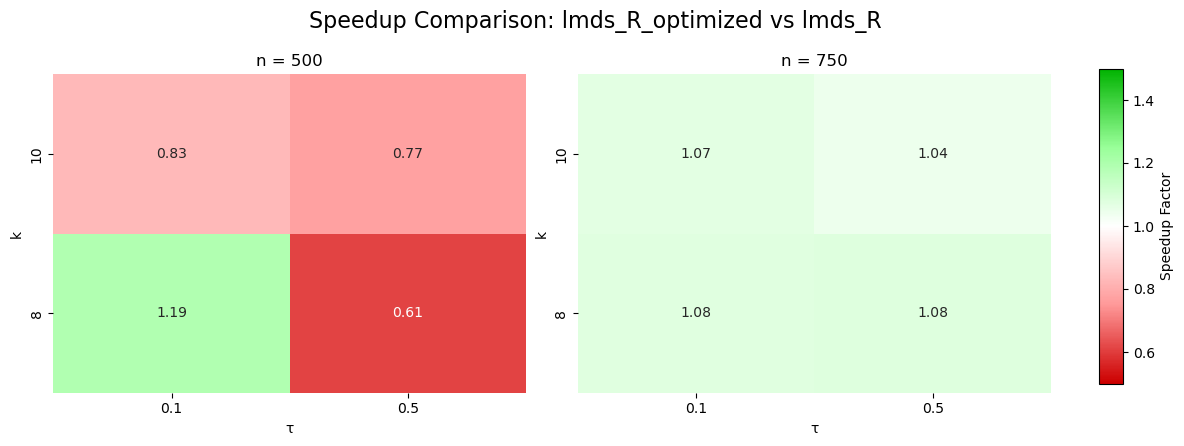

In [ ]:
# Read data
results_path = os.path.join('d_and_c', 'LMDS', 'optimization_benchmark')
csv_path = os.path.join(results_path, 'LMDS_optimization_results.csv')
results = pd.read_csv(csv_path)
results['speedup'] = results['original_time'] / results['optimized_time']

# Create plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))
fig.suptitle('Speedup Comparison: lmds_R_optimized vs lmds_R',
             fontsize=16, y=0.98)

# Create a custom colormap: red for <1, white for =1, green for >1
colors = [(0.8, 0.0, 0.0),    # Dark red for worst slowdown
          (1.0, 0.6, 0.6),    # Light red
          (1.0, 1.0, 1.0),    # White for no change (value = 1)
          (0.6, 1.0, 0.6),    # Light green
          (0.0, 0.7, 0.0)]    # Dark green for best speedup

# Create colormap with custom normalization
custom_cmap = LinearSegmentedColormap.from_list('red_white_green', colors)

# Find global min/max for consistent coloring
all_speedups = results['speedup'].values
vmin = min(0.5, min(all_speedups))
vmax = max(1.5, max(all_speedups))
center = 1.0

# Loop through each n value to create a separate cross table
for i, n in enumerate(n_values):
    # Filter results for this n value
    n_subset = results[results['n'] == n]

    # Create a pivot table: rows are k values, columns are tau values
    pivot_table = n_subset.pivot_table(
        values='speedup',
        index='k',
        columns='tau',
        aggfunc='mean'
    )

    # Sort axes in ascending order
    pivot_table = pivot_table.sort_index(ascending=False)
    pivot_table = pivot_table.sort_index(axis=1)

    # Create heatmap with custom colormap
    ax = axes[i]
    sns.heatmap(pivot_table, annot=True, fmt='.2f',
                cmap=custom_cmap,
                center=center,
                vmin=vmin, vmax=vmax,
                ax=ax,
                cbar=False)

    ax.set_title(f'n = {n}')
    ax.set_xlabel('τ')
    ax.set_ylabel('k')

# First apply tight_layout to position the main plots
plt.tight_layout()

# Then add colorbar after tight_layout has positioned the subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
sm = plt.cm.ScalarMappable(cmap=custom_cmap,
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Speedup Factor')

# Reduce right margin to make space for colorbar
fig.subplots_adjust(right=0.88)